<a href="https://colab.research.google.com/github/Loop3D/Kalgoorlie_fault_network/blob/main/report_files/final_fault_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
if 'google.colab' in str(get_ipython()):
      !git clone https://github.com/Loop3D/Kalgoorlie_fault_network.git
      %cd Kalgoorlie_fault_network/report_files
      !pip install git+https://github.com/Loop3D/LoopProjectFile.git
      !pip install git+https://github.com/Loop3D/map2loop-2.git
      !pip install git+https://github.com/Loop3D/LoopStructural
      !pip install lavavu-osmesa==1.8.32 geopandas meshio rasterio owslib

else:
      print('Not running on CoLab, nothing to do')

Not running on CoLab, nothing to do


In [2]:
def darken_color(color, amount=1.5):
    
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
import geopandas as gpd
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.modelling import ProcessInputData
from LoopStructural.utils import dtm_creator

path_seismic = r"./data/seismic"
path_shp = r"./data/gis"
path_DEM =  r"./data/DEM.tif"

In [4]:
# import the oris and datas
updated_data = pd.read_csv("./data/LoopStructural_data/updated_data.csv")
updated_oris = pd.read_csv("./data/LoopStructural_data/updated_oris.csv")

In [5]:
origin = [214794.5029269870719872, 6501887.2589999996125698, -40000]
maximum = [400411.4882275541312993, 6653021.2462467299774289, 5000]

In [6]:
# Import all fault surfaces

Ida_pts = gpd.read_file(os.path.join(path_shp, "Ida_pts_elevation.shp"))
Ida_pts = pd.DataFrame({'X': Ida_pts.geometry.x, 
                        'Y': Ida_pts.geometry.y, 
                        'Z': Ida_pts.DEM_main_m})

Kunanalling_pts = gpd.read_file(os.path.join(path_shp, "Kunanalling_pts_elevation.shp"))
Kunanalling_pts = pd.DataFrame({'X': Kunanalling_pts.geometry.x, 
                               'Y': Kunanalling_pts.geometry.y, 
                               'Z': Kunanalling_pts.DEM_main})

Bull_N_pts = gpd.read_file(os.path.join(path_shp, "Bullabulling_North.shp"))
Bull_N_pts = pd.DataFrame({'X': Bull_N_pts.geometry.x, 
                         'Y': Bull_N_pts.geometry.y, 
                         'Z': Bull_N_pts.DEM_main})

N_Bulla = gpd.read_file(os.path.join(path_shp, "Bullab_abutting_N_pts_elevation.shp"))
N_Bulla = pd.DataFrame({'X': N_Bulla.geometry.x, 
                   'Y': N_Bulla.geometry.y, 
                   'Z': N_Bulla.DEM_main})
Bull_S_pts = gpd.read_file(os.path.join(path_shp, "Bullabulling_South.shp"))
Bull_S_pts = pd.DataFrame({'X': Bull_S_pts.geometry.x, 
                         'Y': Bull_S_pts.geometry.y, 
                         'Z': Bull_S_pts.DEM_main})

# Add abutting fault North for Bullabulling
S_Bulla = gpd.read_file(os.path.join(path_shp, "Bullab_abutting_S_pts_elevation.shp"))

# make this vertical
S_Bulla = pd.DataFrame({'X': S_Bulla.geometry.x, 
                   'Y': S_Bulla.geometry.y, 
                   'Z': S_Bulla.DEM_main})

Zuleika_pts = gpd.read_file(os.path.join(path_shp, "Zuleika_pts_elevation.shp"))
Zuleika_pts = pd.DataFrame({'X': Zuleika_pts.geometry.x, 
              'Y': Zuleika_pts.geometry.y, 
              'Z': Zuleika_pts.DEM_main})

MtMonger_pts = gpd.read_file(os.path.join(path_shp, "MtMonger_pts_elevation.shp"))
MtMonger_pts = pd.DataFrame({'X': MtMonger_pts.geometry.x, 
              'Y': MtMonger_pts.geometry.y, 
              'Z': MtMonger_pts.DEM_main})
MtMonger_pts['fault_name'] = "MtMonger Fault"

Kanowna_pts = gpd.read_file(os.path.join(path_shp, "Kanowna_pts_elevation.shp"))
Kanowna_pts = pd.DataFrame({'X': Kanowna_pts.geometry.x, 
              'Y': Kanowna_pts.geometry.y, 
              'Z': Kanowna_pts.DEM_main})
Kanowna_pts['fault_name'] = "Kanowna Fault"

Boorara_pts = gpd.read_file(os.path.join(path_shp, "Boorara_pts_elevation.shp"))
Boorara_pts = pd.DataFrame({'X': Boorara_pts.geometry.x, 
              'Y': Boorara_pts.geometry.y, 
              'Z': Boorara_pts.DEM_main})

Boorara_pts['fault_name'] = "Boorara Fault"


BL_pts = gpd.read_file(os.path.join(path_shp, "BL_pts_elevation_2.shp"))
BL_pts = pd.DataFrame({'X': BL_pts.geometry.x, 
              'Y': BL_pts.geometry.y, 
              'Z': BL_pts.DEM_main})
BL_pts['fault_name'] = "Boulder Lefroy Fault"


AW_pts = gpd.read_file(os.path.join(path_shp, "Abattoir_West_pts_elevation.shp"))
AW_pts = pd.DataFrame({'X': AW_pts.geometry.x, 
              'Y': AW_pts.geometry.y, 
              'Z': AW_pts.DEM_main})
AW_pts['fault_name'] = "Abattoir West Fault"


AE_pts = gpd.read_file(os.path.join(path_shp, "Abattoir_East_pts_elevation.shp"))
AE_pts = pd.DataFrame({'X': AE_pts.geometry.x, 
              'Y': AE_pts.geometry.y, 
              'Z': AE_pts.DEM_main})
AE_pts['fault_name'] = "Abattoir East Fault"


BF_pts = gpd.read_file(os.path.join(path_shp, "Black_Flag_pts_elevation.shp"))
BF_pts = pd.DataFrame({'X': BF_pts.geometry.x, 
              'Y': BF_pts.geometry.y, 
              'Z': BF_pts.DEM_main})
BF_pts['fault_name'] = "Black Flag Fault"


Speedway_pts = gpd.read_file(os.path.join(path_shp, "Speedway_pts_elevation.shp"))
Speedway_pts = pd.DataFrame({'X': Speedway_pts.geometry.x, 
              'Y': Speedway_pts.geometry.y, 
              'Z': Speedway_pts.DEM_main})
Speedway_pts['fault_name'] = "Speedway Fault"


Tramways_pts = gpd.read_file(os.path.join(path_shp, "Tramways_pts_elevation.shp"))
Tramways_pts = pd.DataFrame({'X': Tramways_pts.geometry.x, 
              'Y': Tramways_pts.geometry.y, 
              'Z': Tramways_pts.DEM_main})
Tramways_pts['fault_name'] = "Tramways Fault"

In [7]:
# import all seismics



Boorara_seismic = gpd.read_file(os.path.join(path_seismic, "Boorara_fault.shp"))
Boorara_seismic = Boorara_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
Boorara_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
Boorara_seismic['fault_name'] = Boorara_seismic['fault_name'].str.replace('Boorara Shear Zone', "Boorara Fault")

#####
BL_seismic = gpd.read_file(os.path.join(path_seismic, "Boulder_Lefroy_cropped.shp"))
BL_seismic = BL_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
BL_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
BL_seismic['fault_name'] = BL_seismic['fault_name'].str.replace('Boulder-Lefroy Shear Zone', "Boulder Lefroy Fault")
BL_seismic = BL_seismic.drop(BL_seismic[BL_seismic['Z']>0].index)
                             
###### 
AE_seismic = gpd.read_file(os.path.join(path_seismic, "Abattoir_East_Fault.shp"))
AE_seismic = AE_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
AE_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
AE_seismic['fault_name'] = AE_seismic['fault_name'].str.replace('Abattoir', "Abattoir East Fault")

AW_seismic = gpd.read_file(os.path.join(path_seismic, "Abattoir_West_Fault.shp"))
AW_seismic = AW_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
AW_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
AW_seismic['fault_name'] = AW_seismic['fault_name'].str.replace('unnamed02', "Abattoir West Fault")
#####
BF_seismic = gpd.read_file(os.path.join(path_seismic, "Black_Flag.shp"))
BF_seismic = BF_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
BF_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
BF_seismic['fault_name'] = BF_seismic['fault_name'].str.replace('Black Flag', "BLack Flag Fault")

#####
Tramways_seismic = gpd.read_file(os.path.join(path_seismic, "Tramways_fault.shp"))
Tramways_seismic = Tramways_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
Tramways_seismic.columns = ['X', 'Y', 'Z', 'fault_name']

#####
MtMonger_seismic = gpd.read_file(os.path.join(path_seismic, "MtMonger_fault.shp"))
MtMonger_seismic = MtMonger_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
MtMonger_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
MtMonger_seismic['fault_name'] = MtMonger_seismic['fault_name'].str.replace('Mount Monger Fault', "MtMonger Fault")

######
Kanowna_seismic = gpd.read_file(os.path.join(path_seismic, "Kanowna_fault.shp"))
Kanowna_seismic = Kanowna_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
Kanowna_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
Kanowna_seismic['fault_name'] = Kanowna_seismic['fault_name'].str.replace('Kanowna', "Kanowna Fault")

#####
Ida_seismic = gpd.read_file(os.path.join(path_seismic, "Ida_fault.shp"))
Ida_seismic = Ida_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
Ida_seismic.columns = ['X', 'Y', 'Z', 'fault_name']

####
Kunanalling_seismic = gpd.read_file(os.path.join(path_seismic, "Kunanalling_fault.shp"))
Kunanalling_seismic = Kunanalling_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
Kunanalling_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
Kunanalling_seismic['fault_name'] = "Kunanalling Fault"

#####
Bull_seismic = gpd.read_file(os.path.join(path_seismic, "Bullabulling_fault.shp"))
Bull_seismic = Bull_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
Bull_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
Bull_seismic['fault_name'] = 'Bullabulling Fault'

#####
Zuleika_seismic = gpd.read_file(os.path.join(path_seismic, "Zuleika_fault.shp"))
Zuleika_seismic = Zuleika_seismic[['X', 'Y', 'depth_minu', 'FAULT']]
Zuleika_seismic.columns = ['X', 'Y', 'Z', 'fault_name']
Zuleika_seismic['fault_name'] = Zuleika_seismic['fault_name'].str.replace('Zuleika', "Zuleika Fault")


In [8]:
list_seismic_pts = [Boorara_seismic, BL_seismic, AE_seismic, AW_seismic, BF_seismic, Tramways_seismic, MtMonger_seismic, 
                   Kanowna_seismic, Ida_seismic, Kunanalling_seismic, Bull_seismic, Zuleika_seismic]

list_seismic_names = ['Boorara_seismic', 'Boulder_Lefroy_seismic', 'Abattoir_E_seismic','Abattoir_W_seismic',
                      'Black_Flag_seismic', 'Tramways_seismic', 'MtMonger_seismic', 
                   'Kanowna_seismic', 'Ida_seismic', 'Kunanalling_seismic', 'Bullabulling_seismic', 'Zuleika_seismic']

In [9]:
processor = ProcessInputData(fault_locations = updated_data, fault_orientations = updated_oris,
                            origin=origin, maximum=maximum)

model = GeologicalModel(origin, maximum)

model.data = processor.data
# model.nsteps = [100, 100, 250]
model.dtm = dtm_creator.create_dtm_with_rasterio(path_DEM) 


model.create_and_add_fault('Boulder Lefroy Fault', displacement = 5, nelements=1e4, force_mesh_geometry = False, 
                           regularization = [5,5,5])
model.create_and_add_fault('Boorara Fault', displacement = 5, nelements=1e4, force_mesh_geometry = True, 
                           cpw = 0.2, regularisation = [5, 5, 5])
model.create_and_add_fault('Abattoir East Fault', displacement = 5, nelements=1e4, force_mesh_geometry = False)
model.create_and_add_fault('Abattoir West Fault', displacement = 5, nelements=1e4, force_mesh_geometry = False, cpw = .25)
model.create_and_add_fault('Zuleika Fault', displacement = 5, nelements=1e4, force_mesh_geometry = True, cpw = .05)

model.create_and_add_fault('Ida Fault', displacement = 5, nelements=1e4, force_mesh_geometry = True, 
                          npw=5, cpw = 0.05)
model.create_and_add_fault('Kunanalling Fault', displacement = 5, nelements=1e4, force_mesh_geometry = True, 
                          npw = 5, cpw = 0.05)
model.create_and_add_fault('Bulla_Abut_South', displacement = 5, nelements=1e4)
model.create_and_add_fault('Bulla_Abut_North', displacement = 5, nelements=1e4)
model.create_and_add_fault('Bullabulling South Fault', displacement = 5, nelements=1e4, cpw = 0.2)
model.create_and_add_fault('Bullabulling North Fault', displacement = 5, nelements=1e4, cpw = 0.2)


model.create_and_add_fault('MtMonger Fault', displacement = 5, nelements=1e4, force_mesh_geometry = True, cwp = 0.2)
model.create_and_add_fault('Kanowna Fault', displacement = 5, nelements=1e4, force_mesh_geometry = False, cpw=0.2)


model.create_and_add_fault('Black Flag Fault', displacement = 5, nelements=1e4, force_mesh_geometry = False)
model.create_and_add_fault('Speedway Fault', displacement = 5, nelements=1e4, force_mesh_geometry = False)
model.create_and_add_fault('Tramways Fault', displacement = 5, nelements=1e4, force_mesh_geometry = False)

tang1 = np.tile([-1737.07, -2023.51,  7009.83],
                (model['Black Flag Fault'][0].interpolator.support.barycentre.shape[0],1))

model['Black Flag Fault'][0].interpolator.add_gradient_orthogonal_constraints(
                model['Black Flag Fault'][0].interpolator.support.barycentre,
                vector = tang1, w=1, B=0)


#force the tangents over the fault trace points
tang1 = np.tile([-68993.39,  -6446.72,  37268.88],
                (model['Ida Fault'][0].interpolator.support.barycentre.shape[0],1))

model['Ida Fault'][0].interpolator.add_gradient_orthogonal_constraints(
                model['Ida Fault'][0].interpolator.support.barycentre,
                vector = tang1, w=1, B=0)

# Force the tangents on Bullabulling Fault
tang2 = np.tile([-30838.81,  -3624.64,  12250.14],
                (model['Bullabulling North Fault'][0].interpolator.support.barycentre.shape[0],1))

model['Bullabulling North Fault'][0].interpolator.add_gradient_orthogonal_constraints(
                model['Bullabulling North Fault'][0].interpolator.support.barycentre,
                vector = tang2, w=1, B=0)

tang3 = np.tile([-30838.81,  -3624.64,  12250.14],
                (model['Bullabulling South Fault'][0].interpolator.support.barycentre.shape[0],1))

model['Bullabulling South Fault'][0].interpolator.add_gradient_orthogonal_constraints(
                model['Bullabulling South Fault'][0].interpolator.support.barycentre,
                vector = tang3, w=1, B=0)

model.update(verbose = True)

C:\Users\angel\anaconda3\envs\loop2\lib\site-packages\LoopStructural\modelling\input\process_data.py:315: RuntimeWarning: Mean of empty slice
  ] = np.nanmean(pts, axis=0)
                This will result in only a fault surface, no displacement on older features


Updating geological model. There are: 
 48                     geological features that need to be interpolated



  0%|          | 0/48 [00:00<?, ?it/s]

Model update took: 93.74847364425659 seconds


In [10]:
model['Black Flag Fault'].add_abutting_fault(model['Boorara Fault'])
model['Black Flag Fault'].add_abutting_fault(model['Zuleika Fault'])
model['Tramways Fault'].add_abutting_fault(model['Boorara Fault'])

model['Boorara Fault'].add_abutting_fault(model['Kanowna Fault'])
model['Boorara Fault'].add_abutting_fault(model['MtMonger Fault'])

model['Bullabulling North Fault'].add_abutting_fault(model['Bulla_Abut_North'])
model['Bullabulling South Fault'].add_abutting_fault(model['Bulla_Abut_South'])
model['Bulla_Abut_South'].add_abutting_fault(model['Ida Fault'])
model['Bullabulling North Fault'].add_abutting_fault(model['Kunanalling Fault'])
model['Bulla_Abut_North'].add_abutting_fault(model['Ida Fault'])
model['Bullabulling North Fault'].add_abutting_fault(model['Kanowna Fault'])

model['Kunanalling Fault'].add_abutting_fault(model['Ida Fault'])
model['Kunanalling Fault'].add_abutting_fault(model['Boulder Lefroy Fault'])
model['Kunanalling Fault'].add_abutting_fault(model['Boorara Fault'])

model['Kanowna Fault'].add_abutting_fault(model['MtMonger Fault'])
model['Kanowna Fault'].add_abutting_fault(model['Ida Fault'])

model['MtMonger Fault'].add_abutting_fault(model['Ida Fault'])

model['Boulder Lefroy Fault'].add_abutting_fault(model['Boorara Fault'])
model['Abattoir West Fault'].add_abutting_fault(model['Boorara Fault'])
model['Abattoir East Fault'].add_abutting_fault(model['Boorara Fault'])

model['Abattoir West Fault'].add_abutting_fault(model['Boulder Lefroy Fault'])
model['Abattoir East Fault'].add_abutting_fault(model['Boulder Lefroy Fault'])

model['Abattoir West Fault'].add_abutting_fault(model['Zuleika Fault'])
model['Abattoir East Fault'].add_abutting_fault(model['Zuleika Fault'])

model['Speedway Fault'].add_abutting_fault(model['Boulder Lefroy Fault'])
model['Speedway Fault'].add_abutting_fault(model['Abattoir East Fault'])
model['Speedway Fault'].add_abutting_fault(model['Zuleika Fault'])

model['Zuleika Fault'].add_abutting_fault(model['Boulder Lefroy Fault'])
model['Tramways Fault'].add_abutting_fault(model['Speedway Fault'])
model['Boulder Lefroy Fault'].add_abutting_fault(model['Ida Fault'])

model['Zuleika Fault'].add_abutting_fault(model['Kanowna Fault'])
model['Zuleika Fault'].add_abutting_fault(model['Boorara Fault'])
model['Black Flag Fault'].add_abutting_fault(model['Kanowna Fault'])
model['Boulder Lefroy Fault'].add_abutting_fault(model['Kanowna Fault'])

model['Abattoir West Fault'].add_abutting_fault(model['Abattoir East Fault'])

In [11]:
new_path = r"./outputs/fault_meshes"

def export_verts_tris(verts, tri, name):
    pd.DataFrame(verts, columns = ['X', 'Y', 'Z']).to_csv(os.path.join(new_path, f'vertices_{name}.csv'), index=None)
    pd.DataFrame(tri, columns = ['n1', 'n2', 'n3']).to_csv(os.path.join(new_path,f'triangles_{name}.csv'), index=None)

In [18]:
# Visualize

view = LavaVuModelViewer(model)

view.nelements = 5e6

view.add_isosurface(model['Ida Fault'], colours = ['#a6cee3'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Kunanalling Fault'], colours = ['#b2df8a'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Bulla_Abut_South'], colours = ['#1f78b4'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Bulla_Abut_North'], colours = ['#1f78b4'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Bullabulling South Fault'], colours = ['#33a02c'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Bullabulling North Fault'], colours = ['#33a02c'], value = 0, function = export_verts_tris)
view.add_isosurface(model['MtMonger Fault'], colours = ['#e31a1c'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Zuleika Fault'], colours = ['#fb9a99'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Kanowna Fault'], colours = ['#fdbf6f'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Boorara Fault'], colours = ['#ff7f00'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Boulder Lefroy Fault'], colours = ['#cab2d6'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Abattoir East Fault'], colours = ['#ffff99'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Abattoir West Fault'], colours = ['#7d8b8f'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Black Flag Fault'], colours = ['#b15928'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Speedway Fault'], colours = ['green'], value = 0, function = export_verts_tris)
view.add_isosurface(model['Tramways Fault'], colours = ['blue'], value = 0, function = export_verts_tris)

# # add all the seismic points
# for j in range(len(list_seismic_pts)):
#     view.add_points(list_seismic_pts[j][['X', 'Y', 'Z']], name = list_seismic_names[j], pointsize = 5)

# view.add_points(Ida_pts[['X', 'Y', 'Z']], name = 'Ida_surface_points', pointsize = 5, colour = darken_color('#a6cee3'))
# view.add_points(Kunanalling_pts[['X', 'Y', 'Z']], name = 'Kunanalling_surface_points', pointsize = 5, colour = darken_color('#b2df8a'))
# view.add_points(Bull_N_pts[['X', 'Y', 'Z']], name = 'Bullabulling_N_surface_points', pointsize = 5, colour = darken_color('#33a02c'))
# view.add_points(Bull_S_pts[['X', 'Y', 'Z']], name = 'Bullabulling_S_surface_points', pointsize = 5, colour = darken_color('#33a02c'))
# view.add_points(MtMonger_pts[['X', 'Y', 'Z']], name = 'MtMonger_surface_points', pointsize = 5, colour = darken_color('#e31a1c'))
# view.add_points(Zuleika_pts[['X', 'Y', 'Z']], name = 'Zuleika_surface_points', pointsize = 5, colour = darken_color('#fb9a99'))
# view.add_points(Kanowna_pts[['X', 'Y', 'Z']], name = 'Kanowna_surface_points', pointsize = 5, colour = darken_color('#fdbf6f'))
# view.add_points(Boorara_pts[['X', 'Y', 'Z']], name = 'Boorara_surface_points', pointsize = 5, colour = darken_color('#ff7f00'))
# view.add_points(BL_pts[['X', 'Y', 'Z']], name = 'Boulder_Lefroy_surface_points', pointsize = 5, colour = darken_color('#cab2d6'))
# view.add_points(AE_pts[['X', 'Y', 'Z']], name = 'Abattoir_East_surface_points', pointsize = 5, colour = darken_color('#ffff99'))
# view.add_points(AW_pts[['X', 'Y', 'Z']], name = 'Abattoir_West_surface_points', pointsize = 5, colour = darken_color('#7d8b8f'))
# view.add_points(BF_pts[['X', 'Y', 'Z']], name = 'Black_Flag_surface_points', pointsize = 5, colour = darken_color('#b15928'))
# view.add_points(Speedway_pts[['X', 'Y', 'Z']], name = 'Speedway_surface_points', pointsize = 5, colour = darken_color('green'))
# view.add_points(Tramways_pts[['X', 'Y', 'Z']], name = 'Tramways_surface_points', pointsize = 5, colour = darken_color('blue'))

view.rotation = [-37.933815002441406, -3.9216933250427246, -0.4651407301425934]
# view.zmax = 0.95
# view.display()

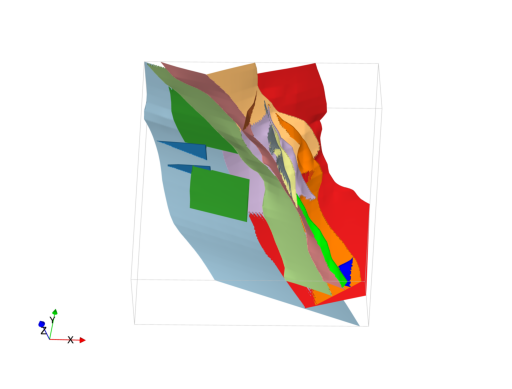

In [20]:
plt.imshow(view.image_array(resolution = (1920, 1440)))
plt.axis('off')
plt.savefig('./assets/fault_model.jpeg', dpi = 500)

In [27]:
view.export_to_webgl(os.path.join(new_path, "fault_model.html"))